 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [13]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [14]:
# Reading whale returns
whale_data = Path("./Resources/whale_returns.csv")

In [15]:
# Reading whale returns data in DataFrame and set the 'Date' column as a datetime index
whale_df = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [16]:
# Sort the data in ascending order index
whale_df = whale_df.sort_index()

In [19]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [20]:
# Drop nulls
whale_df.dropna(inplace=True)

In [21]:
# To check for any nulls after dropping nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [22]:
# Reading algorithmic returns
# Reading algorithmic returns
algo_data = Path("./Resources/algo_returns.csv")
# Reading algorithmic returns data in DataFrame and set the 'Date' column as a datetime index
algo_df = pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
# Sort the data in ascending order index
algo_df = algo_df.sort_index()


In [23]:
# Count nulls
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [24]:
# Drop nulls

algo_df.dropna(inplace=True)

In [25]:
# To check for any nulls after dropping nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [26]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_data = Path("./Resources/sp_tsx_history.csv")

In [27]:
# Reading S&P TSX 60 returns data in DataFrame and set the 'Date' column as a datetime index
sp_tsx_df = pd.read_csv(sp_tsx_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [28]:
# Sort the data in ascending order index
sp_tsx_df = sp_tsx_df.sort_index()

# Check Data Types
sp_tsx_df.dtypes

In [29]:
# Fix Data Types
# Remove the $ symbol in Close and convert into an integer instead of a float
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace("$", "")
sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace(",", "")
sp_tsx_df["Close"] = sp_tsx_df["Close"].astype("float").astype("int") # string --> float --> integer

sp_tsx_df.head()

C:\Users\mayar\AppData\Local\Temp\ipykernel_5324\1422414023.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_df["Close"] = sp_tsx_df["Close"].str.replace("$", "")


,Close
Date,
2012-10-01,12370
2012-10-02,12391
2012-10-03,12359
2012-10-04,12447
2012-10-05,12418


In [30]:
# Calculate Daily Returns
sp_daily_returns = sp_tsx_df.pct_change()
sp_daily_returns.head()


,Close
Date,
2012-10-01,NaN
2012-10-02,0.001698
2012-10-03,-0.002583
2012-10-04,0.007120
2012-10-05,-0.002330


In [31]:
# Drop nulls
sp_daily_returns.dropna(inplace=True)

In [32]:
# To check for any nulls after dropping nulls
sp_daily_returns.isnull().sum()

Close    0
dtype: int64

In [33]:
# Rename `Close` Column to be specific to this portfolio.
# Create a new column name "Daily Returns"
columns = ["Date", "Daily Returns"]
# Use the `rename` function and set the column Close as Daily Returns
sp_daily_returns = sp_daily_returns.rename(columns={
        "Close": "Daily Returns"
})
sp_daily_returns.head()

,Daily Returns
Date,
2012-10-02,0.001698
2012-10-03,-0.002583
2012-10-04,0.007120
2012-10-05,-0.002330
2012-10-09,-0.011677


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [34]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
portfolio_returns_df = pd.concat([whale_df, algo_df, sp_daily_returns], axis="columns", join="inner")
# Sort datetime index in ascending order (past to present)
portfolio_returns_df.sort_index(inplace=True)
portfolio_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008582
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003370
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001392
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009998
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006554


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.


## Performance Anlysis

#### Calculate and Plot the daily returns.

In [35]:
# Calculate Daily Returns by using the `pct_change` function
daily_returns_df = portfolio_returns_df.pct_change()

<Axes: xlabel='Date'>

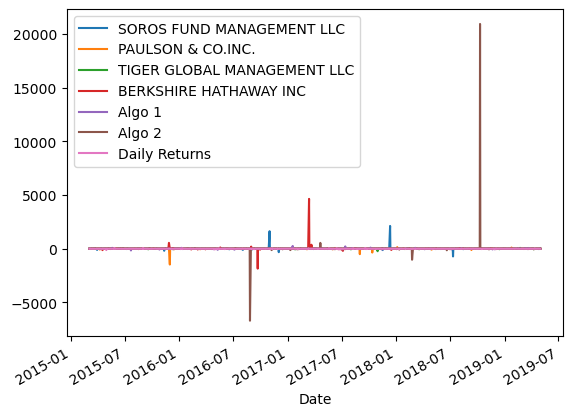

In [36]:
# Plot daily returns of all portfolios
daily_returns_df.plot()

#### Calculate and Plot cumulative returns.

In [37]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + portfolio_returns_df).cumprod() - 1
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008582
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.011923
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.010548
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.020440
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.026861


<Axes: xlabel='Date'>

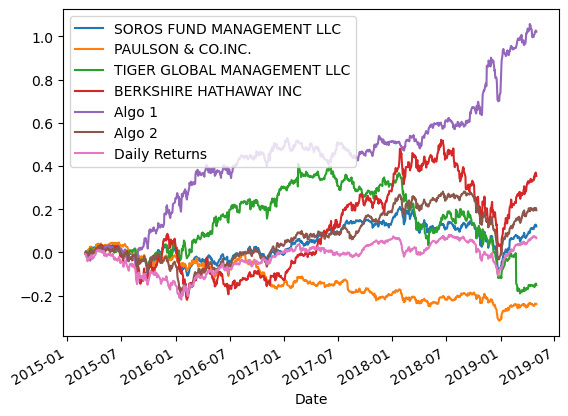

In [38]:
# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<Axes: >

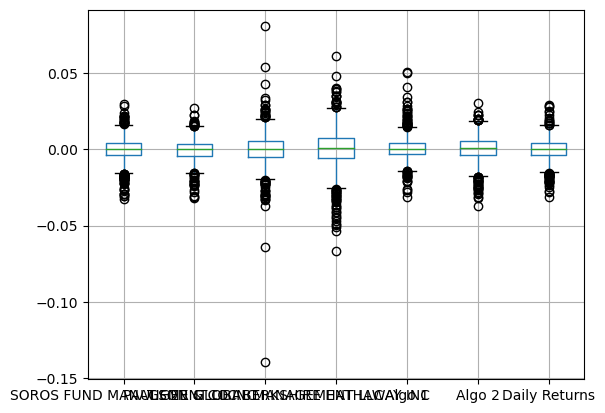

In [39]:
# Box plot to visually show risk
portfolio_returns_df.boxplot()

### Calculate Standard Deviations

In [40]:
# Calculate the daily standard deviations of all portfolios
whale_df_std = whale_df.std()
whale_df.std()

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [41]:
algo_df_std = algo_df.std()
algo_df.std().head()

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [42]:
# Calculate the daily standard deviations of combined portfolios
portfolio_returns_df_std = portfolio_returns_df.std()
portfolio_returns_df_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
Daily Returns                  0.007035
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [43]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_daily_returns_std = sp_daily_returns.std()
sp_daily_returns_std.head()

Daily Returns    0.006638
dtype: float64

In [44]:
# Determine which portfolios are riskier than the S&P TSX 60
(portfolio_returns_df_std > portfolio_returns_df["Daily Returns"].std())

SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
Daily Returns                  False
dtype: bool

### Calculate the Annualized Standard Deviation

In [45]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = portfolio_returns_df_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
Daily Returns                  0.111683
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [46]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
portfolio_returns_df.rolling(window=21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003368
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003318
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003352


<Axes: xlabel='Date'>

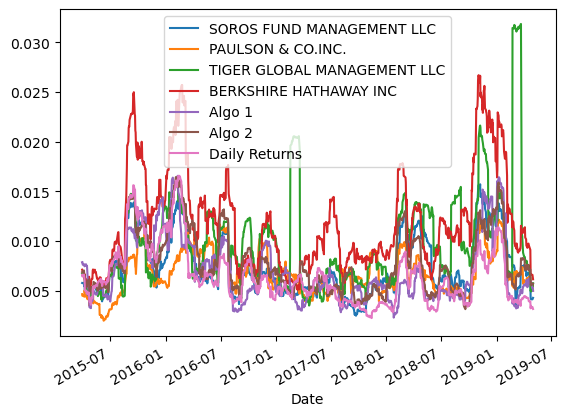

In [47]:
# Plot the rolling standard deviation
portfolio_returns_df.rolling(window=21).std().plot()


### Calculate and plot the correlation

In [48]:
# Calculate the correlation
correlation = portfolio_returns_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.674006
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486613
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440452
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557297
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310317
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737394
Daily Returns,0.674006,0.486613,0.440452,0.557297,0.310317,0.737394,1.000000


<Axes: >

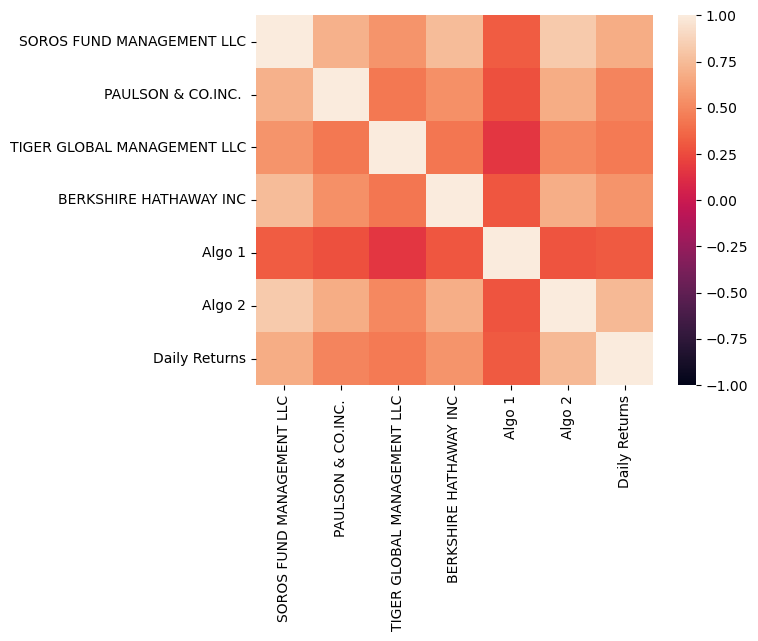

In [49]:
# Display de correlation matrix
import seaborn as sns

sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [50]:
# Calculate covariance of a single portfolio
whale_covariance = (whale_df_std).cov(sp_daily_returns_std)

In [51]:
# Display the covariance of whale portfolio
print(f"Whale covariance: {whale_covariance}")

# Calculate variance of S&P TSX
variance = sp_daily_returns.var()
print(f"S&P TSX 60 variance: {variance}")

# Computing beta

# Plot beta trend

Whale covariance: nan
S&P TSX 60 variance: Daily Returns    0.000044
dtype: float64


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [52]:
# Use `ewm` to calculate the rolling window
portfolio_returns_df.ewm(halflife=21).std()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003686
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.004986
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.005245
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.004550
...,...,...,...,...,...,...,...
2019-04-25,0.006819,0.006342,0.014811,0.010830,0.006526,0.007500,0.004699
2019-04-26,0.006819,0.006448,0.014764,0.010763,0.006433,0.007418,0.004628
2019-04-29,0.006708,0.006357,0.014575,0.010601,0.006378,0.007304,0.004564


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [53]:
# Annualized Sharpe Ratios
sharpe_ratio = portfolio_returns_df.mean()*252/(annualized_std)
# Display sharpe ratio
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
Daily Returns                  0.195327
dtype: float64

<Axes: title={'center': 'Sharpe Ratio'}>

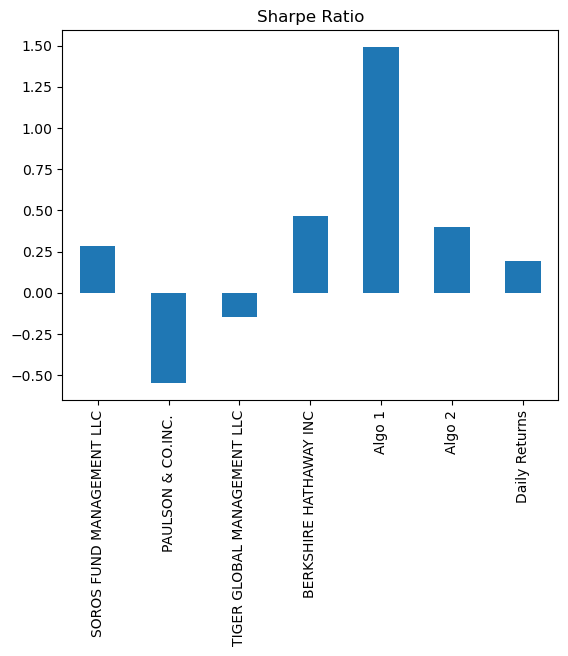

In [54]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar(title = "Sharpe Ratio")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---Yes, Algo 1 and Algo 2 have much higher Sharpe ratios compared to that of S&P TSX 60. This means that for the risk attached to Algo 1 and 2 investments, they are providing way more returns that that of the market

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [55]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import datetime

%matplotlib inline

In [56]:
# Reading data from 1st stock Apple into a DataFrame 
aapl_data = Path("./Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_data)
aapl_df.head()

,Date,CLOSE
0,1/02/2018 16:00,43.07
1,1/03/2018 16:00,43.06
2,1/04/2018 16:00,43.26
3,1/05/2018 16:00,43.75
4,1/08/2018 16:00,43.59


In [57]:
# Drop the time component of the date
import datetime
start = '01/02/2018 16.00'
date = datetime.datetime.strptime(start, '%bb/%dd/%yyyy').date()
aapl_df.index = aapl_df.index.date
aapl_df.head()

ValueError: time data '01/02/2018 16.00' does not match format '%bb/%dd/%yyyy'

In [58]:
# Reading data from 2nd stock Amazon into a FataFrame
amzn_data = Path("./Resources/amzn_historical.csv")
amzn_df = pd.read_csv(amzn_data)
amzn_df.head()


,Date,close
0,1/03/2017 16:00,37.68
1,1/04/2017 16:00,37.86
2,1/05/2017 16:00,39.02
3,1/06/2017 16:00,39.80
4,1/09/2017 16:00,39.85


In [59]:
# Reading data from 3rd stock Google into a DataFrame
goog_data = Path("./Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_data)
goog_df.head()

,Date,Close
0,1/03/2017 16:00,39.31
1,1/04/2017 16:00,39.35
2,1/05/2017 16:00,39.70
3,1/06/2017 16:00,40.31
4,1/09/2017 16:00,40.33


In [60]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([aapl_df, amzn_df, goog_df],  axis="columns", join="inner")
combined_df.head()

,Date,CLOSE,Date,close,Date,Close
0,1/02/2018 16:00,43.07,1/03/2017 16:00,37.68,1/03/2017 16:00,39.31
1,1/03/2018 16:00,43.06,1/04/2017 16:00,37.86,1/04/2017 16:00,39.35
2,1/04/2018 16:00,43.26,1/05/2017 16:00,39.02,1/05/2017 16:00,39.70
3,1/05/2018 16:00,43.75,1/06/2017 16:00,39.80,1/06/2017 16:00,40.31
4,1/08/2018 16:00,43.59,1/09/2017 16:00,39.85,1/09/2017 16:00,40.33


In [61]:
# Set the index as the 'Date' column
combined_df.set_index(combined_df['Date'], inplace=True)
combined_df.head()

TypeError: The parameter "keys" may be a column key, one-dimensional array, or a list containing only valid column keys and one-dimensional arrays.. Received column of type <class 'pandas.core.frame.DataFrame'>

In [62]:
# Use the `drop` function to delete some of the columns
combined_df = combined_df.drop(columns=["Date", "Open", "High", "Low", "Volume","date", "DATE"])
combined_df.head()

KeyError: "['Date' 'Open' 'High' 'Low' 'Volume' 'date' 'DATE'] not found in axis"

In [ ]:
# Sort the index
combined_df.sort_index(inplace=True)

In [34]:
# Reorganize portfolio data by having a column per symbol
# Use the `rename` function and set the `columns` parameter to a dictionary of new column names
# Set the `columns` attribute to a new list of column names
combined_df = combined_df.rename(columns = {
    "CLOSE": "APPLE",
    "close": "AMAZON",
    "Close": "GOOGLE"
})
combined_df.head()

,Date,APPLE,Date,AMAZON,Date,GOOGLE
0,1/02/2018 16:00,43.07,1/03/2017 16:00,37.68,1/03/2017 16:00,39.31
1,1/03/2018 16:00,43.06,1/04/2017 16:00,37.86,1/04/2017 16:00,39.35
2,1/04/2018 16:00,43.26,1/05/2017 16:00,39.02,1/05/2017 16:00,39.70
3,1/05/2018 16:00,43.75,1/06/2017 16:00,39.80,1/06/2017 16:00,40.31
4,1/08/2018 16:00,43.59,1/09/2017 16:00,39.85,1/09/2017 16:00,40.33


In [51]:
# Calculate daily returns
combined_returns = combined_df.pct_change()
combined_returns.head()

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [ ]:
# Drop NAs
combined_returns.dropna(inplace=True)
#Check if nulls dropped
combined_returns.isnull().sum()

In [36]:
# Display sample data
combined_returns.head()

NameError: name 'combined_returns' is not defined

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [37]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Set weights for corresponding risk profile of stocks: APPLE, AMAZON, GOOGLE
weights = [0.33, 0.33, 0.34]

# Calculate portfolio return
portfolio_returns = combined_returns.dot(weights)

# Display sample data
portfolio_returns.head()

NameError: name 'combined_returns' is not defined

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [38]:
# Join your returns DataFrame to the original returns DataFrame
joint_portfolio_returns = pd.concat([portfolio_returns, portfolio_returns_df])
joint_portfolio_returns = joint_portfolio_returns.rename(columns={0: "My Portfolio"})
joint_portfolio_returns.head()


NameError: name 'portfolio_returns' is not defined

In [39]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# Drop NAs
joint_portfolio_returns.dropna(inplace=True)
#Check if nulls dropped
joint_portfolio_returns.isnull().sum()

NameError: name 'joint_portfolio_returns' is not defined

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [40]:
# Calculate the annualized `std`
# Calculate the daily standard deviations of own portfolios
combined_returns_std = combined_returns.std()
combined_returns_std.head()

NameError: name 'combined_returns' is not defined

In [41]:
# Calculate the annualized standard deviation (252 trading days)
combined_annualized_std = combined_returns_std * np.sqrt(252)
combined_annualized_std.head()

NameError: name 'combined_returns_std' is not defined

### Calculate and plot rolling `std` with 21-day window

In [42]:
# Calculate rolling standard deviation
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_annualized_std.rolling(window=21).std()

# Plot rolling standard deviation


NameError: name 'combined_annualized_std' is not defined

### Calculate and plot the correlation

In [43]:
# Calculate and plot the correlation
correlation = joint_portfolio_returns.corr()
correlation

NameError: name 'joint_portfolio_returns' is not defined

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [44]:
# Calculate and plot Beta
# Calculate 60 day rolling covariance
rolling_joint_portfolio_covariance = joint_portfolio_returns.rolling(window=30).cov(sp_daily_returns)
rolling_joint_portfolio_covariance.head()

NameError: name 'joint_portfolio_returns' is not defined

In [45]:
# Calculate 60 day rolling variance
rolling_variance = sp_daily_returns.rolling(window=60).var()
rolling_variance.head()

NameError: name 'sp_daily_returns' is not defined

In [46]:
# Calculate beta
rolling_beta = rolling_joint_portfolio_covariance/rolling_variance
rolling_beta.head()

NameError: name 'rolling_joint_portfolio_covariance' is not defined

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [47]:
# Calculate Annualized Sharpe Ratios
joint_sharpe_ratio = joint_portfolio_returns.mean()*(252)/combined_annualized_std*np.sqrt(252)
joint_sharpe_ratio.head()

NameError: name 'joint_portfolio_returns' is not defined

In [48]:
# Visualize the sharpe ratios as a bar plot
joint_sharpe_ratio.plot.bar

NameError: name 'joint_sharpe_ratio' is not defined

In [49]:
# At this point, I realised that my custom portfolio has dates from Google Finance function of 2022 and 2023 whereas the dates for the data given for whale and algo portfolios are for 2014 to 2019
# So at this point, I decided to change my custom portfolio to the ones given in the Instructions - otex, L and shop, because the dates here are kind of matching with that of whale and algo
# So here goes again!

In [50]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [183]:
# Reading data from 1st stock OTEX into a DataFrame 
otex_data = Path("./Resources/otex_historical.csv")
otex_df = pd.read_csv(otex_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
otex_df.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [184]:
# Rename Column Close as OTEX
otex_df.rename(columns={"Close": "OTEX"})

,Symbol,OTEX
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16
...,...,...
2019-12-20,OTEX,58.68
2019-12-23,OTEX,57.89
2019-12-24,OTEX,57.44


In [185]:
# Reading data from 2nd stock L into a DataFrame 
l_data = Path("./Resources/l_historical.csv")
l_df = pd.read_csv(l_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
l_df.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [186]:
# Rename Column Close as L
l_df.rename(columns={"Close": "L"})

,Symbol,L
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86
...,...,...
2019-12-20,L,67.90
2019-12-23,L,67.68
2019-12-24,L,67.67


In [187]:
# Reading data from 3rd stock SHOP into a DataFrame 
shop_data = Path("./Resources/shop_historical.csv")
shop_df = pd.read_csv(shop_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
shop_df.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [188]:
# Rename Column Close as SHOP
shop_df.rename(columns={"Close": "SHOP"})

,Symbol,SHOP
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51
...,...,...
2019-12-20,SHOP,513.22
2019-12-23,SHOP,511.62
2019-12-24,SHOP,525.39


In [189]:
# Combine all stocks in a single DataFrame
new_combined_df = pd.concat([otex_df, l_df, shop_df], axis="columns", join= "inner")
new_combined_df.head

<bound method NDFrame.head of            Symbol  Close Symbol  Close Symbol   Close
Date                                                 
2018-01-02   OTEX  43.58      L  57.99   SHOP  132.06
2018-01-03   OTEX  43.07      L  57.41   SHOP  135.15
2018-01-04   OTEX  42.91      L  57.42   SHOP  137.46
2018-01-05   OTEX  42.57      L  57.42   SHOP  137.26
2018-01-08   OTEX  42.16      L  56.86   SHOP  139.51
...           ...    ...    ...    ...    ...     ...
2019-12-20   OTEX  58.68      L  67.90   SHOP  513.22
2019-12-23   OTEX  57.89      L  67.68   SHOP  511.62
2019-12-24   OTEX  57.44      L  67.67   SHOP  525.39
2019-12-27   OTEX  57.70      L  67.78   SHOP  534.76
2019-12-30   OTEX  57.19      L  67.33   SHOP  517.79

[501 rows x 6 columns]>

In [190]:
# Sort the index
new_combined_df.sort_index(inplace=True)
new_combined_df.head()

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,OTEX,43.58,L,57.99,SHOP,132.06
2018-01-03,OTEX,43.07,L,57.41,SHOP,135.15
2018-01-04,OTEX,42.91,L,57.42,SHOP,137.46
2018-01-05,OTEX,42.57,L,57.42,SHOP,137.26
2018-01-08,OTEX,42.16,L,56.86,SHOP,139.51


In [191]:
# Drop the columns 'Symbol'
new_combined_df.drop(columns={"Symbol"})

,Close,Close,Close
Date,,,
2018-01-02,43.58,57.99,132.06
2018-01-03,43.07,57.41,135.15
2018-01-04,42.91,57.42,137.46
2018-01-05,42.57,57.42,137.26
2018-01-08,42.16,56.86,139.51
...,...,...,...
2019-12-20,58.68,67.90,513.22
2019-12-23,57.89,67.68,511.62
2019-12-24,57.44,67.67,525.39


In [192]:
# Calculate daily returns
new_combined_df = new_combined_df.pct_change()
new_combined_df.head()

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [193]:
# Drop NAs
new_combined_df.dropna(inplace=True)
#Check if nulls dropped
new_combined_df.isnull().sum()

Symbol    0
Close     0
Symbol    0
Close     0
Symbol    0
Close     0
dtype: int64

In [194]:
# Display sample data
new_combined_df.head()

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,OTEX,43.58,L,57.99,SHOP,132.06
2018-01-03,OTEX,43.07,L,57.41,SHOP,135.15
2018-01-04,OTEX,42.91,L,57.42,SHOP,137.46
2018-01-05,OTEX,42.57,L,57.42,SHOP,137.26
2018-01-08,OTEX,42.16,L,56.86,SHOP,139.51


In [195]:
# Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
# Set weights
weights = [1/3, 1/3, 1/3]

# Set weights for corresponding risk profile of stocks: OTEX, L, SHOP
weights = [0.33, 0.33, 0.34]

# Calculate portfolio return
new_combined_df = new_combined_df.dot(weights)

# Display sample data
new_combined_df.head()


ValueError: Dot product shape mismatch, (501, 6) vs (3,)

In [196]:
# Join your portfolio returns to the DataFrame that contains all of the portfolio returns
# Join your returns DataFrame to the original returns DataFrame
new_joint_portfolio_returns = pd.concat([new_combined_df, portfolio_returns_df])
new_joint_portfolio_returns = new_joint_portfolio_returns.rename(columns={0: "My Portfolio"})
new_joint_portfolio_returns.head()


InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [197]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# Drop NAs
new_joint_portfolio_returns.dropna(inplace=True)
#Check if nulls dropped
new_joint_portfolio_returns.isnull().sum()

NameError: name 'new_joint_portfolio_returns' is not defined

In [ ]:
# Re-run the risk analysis with your portfolio to see how it compares to the others
# Calculate the Annualized Standard Deviation
# Calculate the annualized `std`

In [200]:
# Calculate the daily standard deviations of own portfolios
new_joint_portfolio_returns_std = new_joint_portfolio_returns.std()
new_joint_portfolio_returns_std.head()

NameError: name 'new_joint_portfolio_returns' is not defined

In [202]:
# combined_annualized_std
# Calculate the annualized standard deviation (252 trading days)
combined_annualized_std = combined_returns_std * np.sqrt(252)
combined_annualized_std.head()

NameError: name 'combined_returns_std' is not defined

In [ ]:
# Calculate and plot rolling std with 21-day window
# Calculate rolling standard deviation
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_annualized_std.rolling(window=21).std()
​
# Plot rolling standard deviation
​

### How does your portfolio do?

Write your answer here!